In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Auta_uhlikova_stopa.csv", index_col="Model")
df = df.apply(pd.to_numeric, errors="coerce")
df.head()

,Vykon_kW,Baterie_kWh,Vyrobni_emise_kg,Spotreba_100_km,Emise_CO2_g_km
Model,,,,,
Skoda Scala TSI,81,0.00,6000,4.70,111.00
Skoda Scala TDI,85,0.00,6000,4.40,126.00
Hyundai Kona,111,48.40,16000,14.60,68.11


In [173]:
annual_emissions = pd.read_csv(
    "Annual Emmissions Development.csv",
    index_col=0,
    header=None,
    skiprows=1,
    names=["emissions_per_kwh"],
)

annual_emissions.index = annual_emissions.index.astype(int)


# annual_emissions = annual_emissions.apply(pd.to_numeric, errors="coerce")


# annual_emissions = annual_emissions.rename(


#     columns={"Unnamed: 0": "rok", "0": "emissions_per_kwh"}


# )


# annual_emissions = annual_emissions.loc[2023:2030]
annual_emissions

,emissions_per_kwh
2014,0.50
2015,0.50
2016,0.50
2017,0.50
2018,0.50
2019,0.50
2020,0.48
2021,0.47
2022,0.47
2023,0.47


In [174]:
annual_mileage = [10000, 15000, 20000]

for mileage in annual_mileage:
    df[f"Najezd_{mileage}"] = df["Vyrobni_emise_kg"] + (
        mileage / 1000 * df["Emise_CO2_g_km"]
    )
df

,Vykon_kW,Baterie_kWh,Vyrobni_emise_kg,Spotreba_100_km,Emise_CO2_g_km,Najezd_10000,Najezd_15000,Najezd_20000
Model,,,,,,,,
Skoda Scala TSI,81,0.00,6000,4.70,111.00,7110.00,7665.00,8220.00
Skoda Scala TDI,85,0.00,6000,4.40,126.00,7260.00,7890.00,8520.00
Hyundai Kona,111,48.40,16000,14.60,68.11,16681.10,17021.65,17362.20


In [175]:
# car_emissions = pd.DataFrame(columns=list(range(2023, 2031)))

car_emissions = pd.DataFrame(index=df.index, columns=range(2023, 2031))


car_emissions

,2023,2024,2025,2026,2027,2028,2029,2030
Model,,,,,,,,
Skoda Scala TSI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Skoda Scala TDI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hyundai Kona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
cars = ["Skoda Scala TSI", "Skoda Scala TDI", "Hyundai Kona"]

for car in cars:
    car_emissions.loc[car] = 0

car_emissions

,2023,2024,2025,2026,2027,2028,2029,2030
Model,,,,,,,,
Skoda Scala TSI,0,0,0,0,0,0,0,0
Skoda Scala TDI,0,0,0,0,0,0,0,0
Hyundai Kona,0,0,0,0,0,0,0,0


In [177]:
car_emissions_10000 = car_emissions

In [178]:
# for car in cars:
#     for year in car_emissions_10000.columns:
#         emissions_per_km = df.loc[car]["Emise_CO2_g_km"]
#         production_emissions = df.loc[car]["Vyrobni_emise_kg"]
#         car_emissions_10000.loc[car][year] = (
#             emissions_per_km * 10000 + production_emissions
#         )

# car_emissions_10000

In [179]:
for car in cars:
    for year in car_emissions_10000.columns:
        emissions_per_km = df.loc[car]["Emise_CO2_g_km"]
        production_emissions = df.loc[car]["Vyrobni_emise_kg"]
        car_emissions_10000.loc[car][year] = round(
            emissions_per_km * (year - 2022) * 10000 / 1000 + production_emissions, 1
        )
car_emissions_10000

,2023,2024,2025,2026,2027,2028,2029,2030
Model,,,,,,,,
Skoda Scala TSI,7110.00,8220.00,9330.00,10440.00,11550.00,12660.00,13770.00,14880.00
Skoda Scala TDI,7260.00,8520.00,9780.00,11040.00,12300.00,13560.00,14820.00,16080.00
Hyundai Kona,16681.10,17362.20,18043.30,18724.40,19405.50,20086.60,20767.70,21448.80


In [180]:
pd.set_option("display.float_format", "{:.2f}".format)

car_emissions_10000.loc["Hyundai Kona*"] = 0


for year in car_emissions_10000.columns:
    emissions_per_km = annual_emissions.loc[year]["emissions_per_kwh"] * 0.146

    production_emissions = df.loc["Hyundai Kona"]["Vyrobni_emise_kg"]

    car_emissions_10000.loc["Hyundai Kona*"][year] = round(
        emissions_per_km * (year - 2022) * 10000 + production_emissions, 1
    )
car_emissions_10000

,2023,2024,2025,2026,2027,2028,2029,2030
Model,,,,,,,,
Skoda Scala TSI,7110.00,8220.00,9330.00,10440.00,11550.00,12660.00,13770.00,14880.00
Skoda Scala TDI,7260.00,8520.00,9780.00,11040.00,12300.00,13560.00,14820.00,16080.00
Hyundai Kona,16681.10,17362.20,18043.30,18724.40,19405.50,20086.60,20767.70,21448.80
Hyundai Kona*,16681.10,17335.30,17944.30,18490.90,18959.30,19335.60,19607.90,19766.80


Text(0.5, 1.0, 'Kumulované emise při ročním nájezdu 10.000 km')

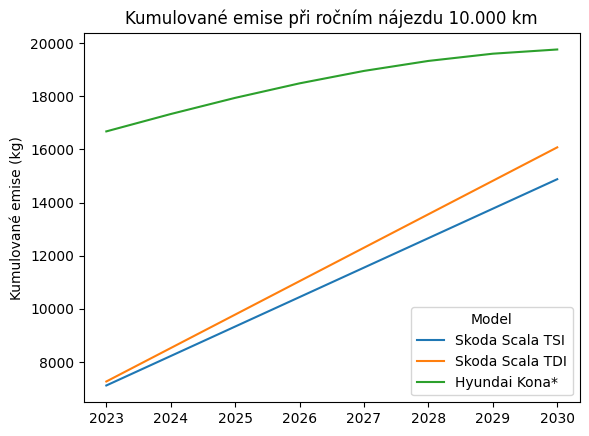

In [181]:
car_emissions_10000.drop("Hyundai Kona").transpose().plot()

plt.ylabel("Kumulované emise (kg)")
plt.title("Kumulované emise při ročním nájezdu 10.000 km")

In [182]:
car_emissions_15000 = car_emissions

for car in cars:
    for year in car_emissions_15000.columns:
        emissions_per_km = df.loc[car]["Emise_CO2_g_km"]
        production_emissions = df.loc[car]["Vyrobni_emise_kg"]
        car_emissions_15000.loc[car][year] = round(
            emissions_per_km * (year - 2022) * 15000 / 1000 + production_emissions, 1
        )

car_emissions_15000

,2023,2024,2025,2026,2027,2028,2029,2030
Model,,,,,,,,
Skoda Scala TSI,7665.00,9330.00,10995.00,12660.00,14325.00,15990.00,17655.00,19320.00
Skoda Scala TDI,7890.00,9780.00,11670.00,13560.00,15450.00,17340.00,19230.00,21120.00
Hyundai Kona,17021.60,18043.30,19065.00,20086.60,21108.20,22129.90,23151.60,24173.20
Hyundai Kona*,16681.10,17335.30,17944.30,18490.90,18959.30,19335.60,19607.90,19766.80


In [183]:
car_emissions_15000.loc["Hyundai Kona*"] = 0


for year in car_emissions_15000.columns:
    emissions_per_km = annual_emissions.loc[year]["emissions_per_kwh"] * 0.146

    production_emissions = df.loc["Hyundai Kona"]["Vyrobni_emise_kg"]

    car_emissions_15000.loc["Hyundai Kona*"][year] = round(
        emissions_per_km * (year - 2022) * 15000 + production_emissions, 1
    )
car_emissions_15000

,2023,2024,2025,2026,2027,2028,2029,2030
Model,,,,,,,,
Skoda Scala TSI,7665.00,9330.00,10995.00,12660.00,14325.00,15990.00,17655.00,19320.00
Skoda Scala TDI,7890.00,9780.00,11670.00,13560.00,15450.00,17340.00,19230.00,21120.00
Hyundai Kona,17021.60,18043.30,19065.00,20086.60,21108.20,22129.90,23151.60,24173.20
Hyundai Kona*,17021.60,18003.00,18916.50,19736.30,20438.90,21003.30,21411.90,21650.20


Text(0.5, 1.0, 'Kumulované emise při ročním nájezdu 15.000 km')

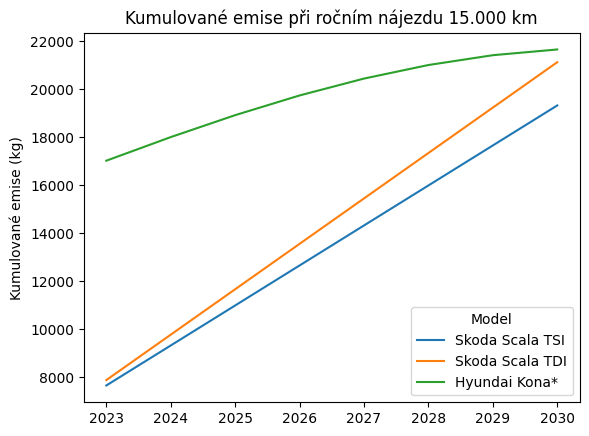

In [184]:
car_emissions_15000.drop("Hyundai Kona").transpose().plot()

plt.ylabel("Kumulované emise (kg)")
plt.title("Kumulované emise při ročním nájezdu 15.000 km")

In [185]:
car_emissions_20000 = car_emissions

for car in cars:
    for year in car_emissions_15000.columns:
        emissions_per_km = df.loc[car]["Emise_CO2_g_km"]
        production_emissions = df.loc[car]["Vyrobni_emise_kg"]
        car_emissions_20000.loc[car][year] = round(
            emissions_per_km * (year - 2022) * 20000 / 1000 + production_emissions, 1
        )

car_emissions_20000

,2023,2024,2025,2026,2027,2028,2029,2030
Model,,,,,,,,
Skoda Scala TSI,8220.00,10440.00,12660.00,14880.00,17100.00,19320.00,21540.00,23760.00
Skoda Scala TDI,8520.00,11040.00,13560.00,16080.00,18600.00,21120.00,23640.00,26160.00
Hyundai Kona,17362.20,18724.40,20086.60,21448.80,22811.00,24173.20,25535.40,26897.60
Hyundai Kona*,17021.60,18003.00,18916.50,19736.30,20438.90,21003.30,21411.90,21650.20


In [186]:
car_emissions_20000.loc["Hyundai Kona*"] = 0


for year in car_emissions_20000.columns:
    emissions_per_km = annual_emissions.loc[year]["emissions_per_kwh"] * 0.146

    production_emissions = df.loc["Hyundai Kona"]["Vyrobni_emise_kg"]

    car_emissions_20000.loc["Hyundai Kona*"][year] = round(
        emissions_per_km * (year - 2022) * 20000 + production_emissions, 1
    )
car_emissions_20000

,2023,2024,2025,2026,2027,2028,2029,2030
Model,,,,,,,,
Skoda Scala TSI,8220.00,10440.00,12660.00,14880.00,17100.00,19320.00,21540.00,23760.00
Skoda Scala TDI,8520.00,11040.00,13560.00,16080.00,18600.00,21120.00,23640.00,26160.00
Hyundai Kona,17362.20,18724.40,20086.60,21448.80,22811.00,24173.20,25535.40,26897.60
Hyundai Kona*,17362.10,18670.60,19888.70,20981.80,21918.50,22671.10,23215.90,23533.60


Text(0.5, 1.0, 'Kumulované emise při ročním nájezdu 20.000 km')

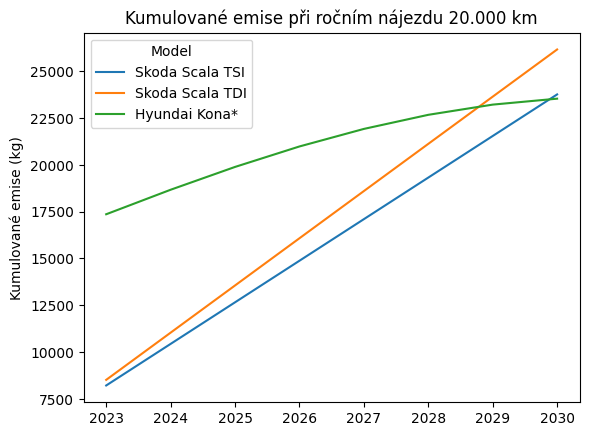

In [187]:
car_emissions_20000.drop("Hyundai Kona").transpose().plot()

plt.ylabel("Kumulované emise (kg)")
plt.title("Kumulované emise při ročním nájezdu 20.000 km")